In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.precision = 2

In [98]:
# データの読み込み
data_sources = {"20_0511_0518": "./weekly/2020_0511_0518.csv",
                "20_0518_0525": "./weekly/2020_0518_0525.csv"}

df = pd.DataFrame(columns=("RANK","MATCH", "WIN", "LOSE", "DRAW", "SCORE"))

for k, v in data_sources.items():
    tmp = pd.read_csv(v, encoding="utf8", dtype="float")
    tmp = tmp[tmp["RANK"]<=100]
    tmp["SOURCE"] = k
    tmp["SOURCE"].astype(str)
    c = len(tmp)
    print(f"Source: {k}, Count: {c}")
    df = pd.concat([df, tmp], ignore_index=True)

Source: 20_0511_0518, Count: 180
Source: 20_0518_0525, Count: 192


In [150]:
def get_prize_zone(rank):
    if rank == 1:
        return "0_1st"
    elif rank == 2:
        return "1_2nd"
    elif rank <= 5:
        return "2_<= 5th"
    elif rank <= 10:
        return "3_<= 10th"
    elif rank <= 50:
        return "4_<= 50th"
    elif rank<= 100:
        return "5_<= 100th"
    else:
        return "out of zone"
    
df["P_ZONE"] = df["RANK"].apply(get_zone)

In [151]:
df["WIN_RATIO"] = df["WIN"]/df["MATCH"]  # 勝率
df["DIFF_W_L"] = df["WIN"]-df["LOSE"]  # 勝敗の差

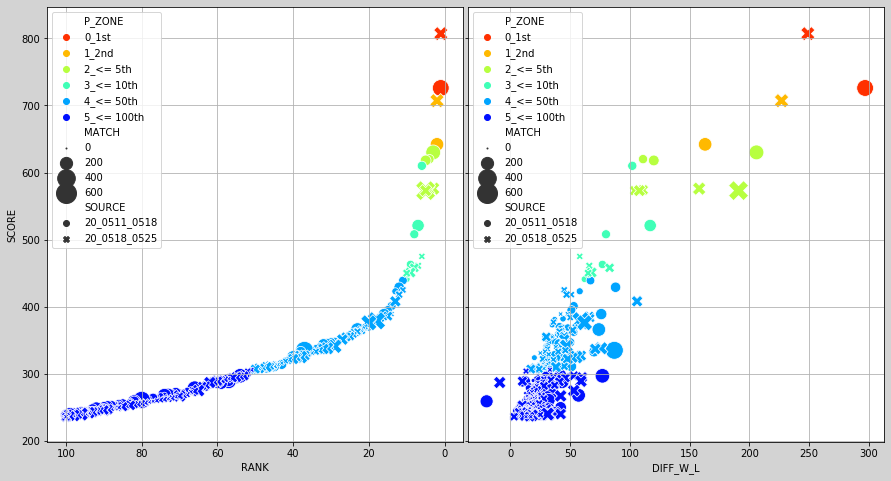

In [153]:
fig, ax = plt.subplots(1, 2, facecolor="lightgray",
                       sharey=True, figsize=(15,8))
fig.subplots_adjust(wspace=0.01)   

sns.scatterplot("RANK", "SCORE", hue="P_ZONE", palette="jet_r", 
                style="SOURCE", size="MATCH", sizes=(1, 400), ax=ax.flatten()[0], data=df)
ax.flatten()[0].grid()
ax.flatten()[0].set_xlim(105, -5)

sns.scatterplot("DIFF_W_L", "SCORE", hue="P_ZONE", palette="jet_r", 
                style="SOURCE", size="MATCH", sizes=(1, 400), ax=ax.flatten()[1], data=df)
ax.flatten()[1].grid()

plt.show()

In [111]:
pd.pivot_table(df, index="ZONE", columns="SOURCE", values="SCORE", aggfunc=["mean", "max", "min", "std"], margins=True)

mean                               max                      \
SOURCE     20_0511_0518 20_0518_0525     All 20_0511_0518 20_0518_0525    All   
0_1st            726.00       807.00  766.50        726.0        807.0  807.0   
1_2nd            642.00       707.00  674.50        642.0        707.0  707.0   
2_<= 5th         622.67       573.80  592.12        630.0        576.0  630.0   
3_<= 10th        508.60       459.00  483.80        610.0        475.0  610.0   
4_<= 50th        350.23       341.82  345.38        439.0        425.0  439.0   
5_<= 100th       261.58       256.16  258.93        302.0        306.0  306.0   
All              300.82       301.70  301.27        726.0        807.0  807.0   

                    min                              std                      
SOURCE     20_0511_0518 20_0518_0525    All 20_0511_0518 20_0518_0525    All  
0_1st             726.0        807.0  726.0          NaN          NaN    NaN  
1_2nd             642.0        707.0  642.0          NaN          NaN    NaN  
2_<= 5th          618.0        573.0  573.0         6.43         1.30  25.54  
3_<= 10th         441.0        450.0  441.0        65.36        10.07  51.25  
4_<= 50th         303.0        307.0  303.0        33.76        32.67  33.23  
5_<= 100th        239.0        236.0  236.0        17.06        18.16  17.77  
All               239.0        236.0  236.0        82.82        84.43  83.54